В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [6]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

=== Метод найменших квадратів (МНК) ===
Коефіцієнти: [-2091.42055657   267.24891283]
RMSE: 4662.505766636395

=== Градієнтний спуск (з нормалізованим X) ===
lr = 0.001 -> theta: [7295.09787802 3253.89324192], RMSE: 4826.473740471969
lr = 0.01 -> theta: [8434.26828366 3762.00690212], RMSE: 4662.505766636395
lr = 0.05 -> theta: [8434.26829786 3762.00690845], RMSE: 4662.505766636395

=== Scikit-learn LinearRegression ===
Коефіцієнти: [np.float64(-2091.4205565650864), np.float64(267.2489128311997)]
RMSE: 4662.505766636395


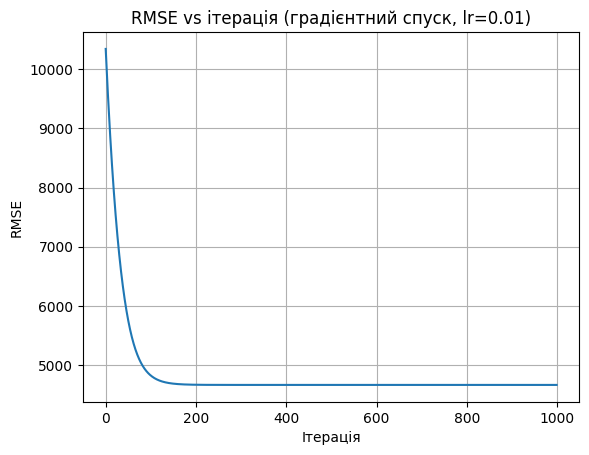

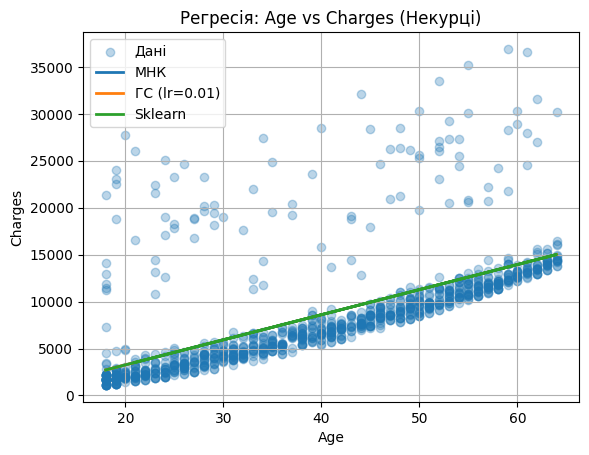

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Завантаження та підготовка даних ---
df = pd.read_csv('/content/medical-charges.csv')
non_smoker_df = df[df.smoker == 'no']
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

# --- Формат для МНК та sklearn ---
X_matrix = np.vstack([np.ones(X.shape[0]), X]).T
X_df = non_smoker_df[['age']]  # для sklearn

# --- Формат для градієнтного спуску: масштабування X ---
X_scaled = (X - X.mean()) / X.std()
X_matrix_scaled = np.vstack([np.ones(X_scaled.shape[0]), X_scaled]).T

# --- 1. Метод найменших квадратів (МНК) ---
theta_mnk = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
y_pred_mnk = X_matrix @ theta_mnk
rmse_mnk = np.sqrt(np.mean((y - y_pred_mnk)**2))

print("=== Метод найменших квадратів (МНК) ===")
print("Коефіцієнти:", theta_mnk)
print("RMSE:", rmse_mnk)

# --- 2. Градієнтний спуск ---
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    errors = []

    for _ in range(n_iter):
        y_pred = X @ theta
        error = y_pred - y
        cost = np.sqrt(np.mean(error**2))
        errors.append(cost)
        gradients = (2/m) * (X.T @ error)
        theta -= lr * gradients

    return theta, errors

learning_rates = [0.001, 0.01, 0.05]
results = {}

print("\n=== Градієнтний спуск (з нормалізованим X) ===")
for lr in learning_rates:
    theta_gd, errors = gradient_descent(X_matrix_scaled, y, lr=lr, n_iter=1000)
    y_pred = X_matrix_scaled @ theta_gd
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    results[lr] = (theta_gd, errors, y_pred, rmse)
    print(f"lr = {lr} -> theta: {theta_gd}, RMSE: {rmse}")

# Вибір найкращого за RMSE
best_lr = min(results, key=lambda k: results[k][3])
best_theta, best_errors, best_y_pred, best_rmse = results[best_lr]

# --- 3. Scikit-learn LinearRegression ---
model = LinearRegression()
model.fit(X_df, y)
y_pred_skl = model.predict(X_df)
rmse_skl = np.sqrt(mean_squared_error(y, y_pred_skl))

print("\n=== Scikit-learn LinearRegression ===")
print("Коефіцієнти:", [model.intercept_, model.coef_[0]])
print("RMSE:", rmse_skl)

# --- Графік: RMSE vs ітерація ---
plt.figure()
plt.plot(best_errors)
plt.title(f'RMSE vs ітерація (градієнтний спуск, lr={best_lr})')
plt.xlabel('Ітерація')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# --- Побудова графіка: точки + 3 регресії ---
plt.figure()
plt.scatter(X, y, alpha=0.3, label='Дані')

# МНК
plt.plot(X, y_pred_mnk, label='МНК', linewidth=2)

# ГС: перетворюємо нормалізовані X назад до оригіналу
X_sorted = np.sort(X)
X_scaled_sorted = (X_sorted - X.mean()) / X.std()
X_plot_scaled = np.vstack([np.ones_like(X_scaled_sorted), X_scaled_sorted]).T
y_plot_gd = X_plot_scaled @ best_theta
plt.plot(X_sorted, y_plot_gd, label=f'ГС (lr={best_lr})', linewidth=2)

# sklearn
plt.plot(X, y_pred_skl, label='Sklearn', linewidth=2)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Регресія: Age vs Charges (Некурці)')
plt.legend()
plt.grid(True)
plt.show()

✅ Висновок

Усі три методи (МНК, градієнтний спуск і scikit-learn) дали однакові результати:

Коефіцієнти майже не відрізняються.

Помилка передбачення (RMSE) теж однакова — близько 4662.

Лінії регресії на графіку повністю збігаються.

Це означає, що всі моделі працюють правильно і добре описують залежність charges від age для некурців.

Також знайдені коефіцієнти логічні:

Кожен рік віку збільшує витрати приблизно на 267 одиниць.

Це відповідає тому, що видно на графіку, і нашим очікуванням.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

=== Лінійна регресія для курців ===
Коефіцієнт (slope): 305.24
Зсув (intercept): 20294.13
RMSE: 10711.00
R² score: 0.1356


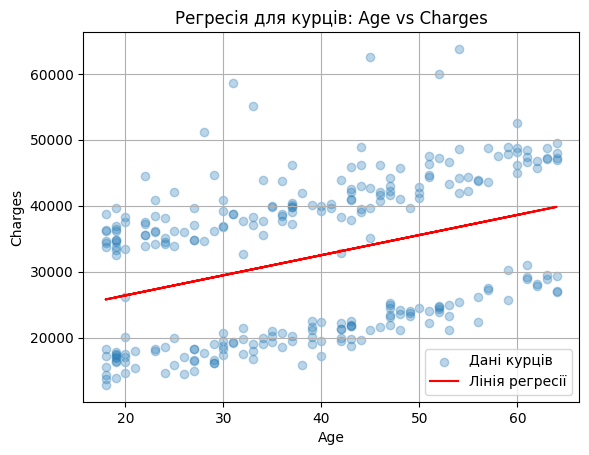

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Завантаження даних ---
df = pd.read_csv('/content/medical-charges.csv')

# --- Фільтруємо лише курців ---
smoker_df = df[df.smoker == 'yes']
X_smokers = smoker_df[['age']]  # 2D масив
y_smokers = smoker_df['charges']

# --- Навчання моделі ---
model_smokers = LinearRegression()
model_smokers.fit(X_smokers, y_smokers)

# --- Прогноз ---
y_pred_smokers = model_smokers.predict(X_smokers)

# --- Оцінка моделі ---
rmse = np.sqrt(mean_squared_error(y_smokers, y_pred_smokers))
r2 = r2_score(y_smokers, y_pred_smokers)

# --- Вивід результатів ---
print("=== Лінійна регресія для курців ===")
print(f"Коефіцієнт (slope): {model_smokers.coef_[0]:.2f}")
print(f"Зсув (intercept): {model_smokers.intercept_:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.4f}")

# --- Візуалізація ---
plt.figure()
plt.scatter(X_smokers, y_smokers, alpha=0.3, label='Дані курців')
plt.plot(X_smokers, y_pred_smokers, color='red', label='Лінія регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Регресія для курців: Age vs Charges')
plt.legend()
plt.grid(True)
plt.show()

**❌ Висновок - Чи використовувати цю модель у компанії?**

Ні, як єдина модель — її використовувати не варто.
Вік пояснює лише малу частину варіації витрат для курців.
У цій групі витрати залежать, імовірно, ще від:

індексу маси тіла (BMI),

наявності хвороб (children, region),

або самого факту куріння як категорії.

📌 Рекомендація: для точнішого прогнозу треба додати більше ознак (багатофакторна регресія).